In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
epseri = pd.read_csv("../../SAFE/Corrected_Pvals_22049_2.csv")
epseri2 = pd.read_csv("Corrected_Pvals_22049_2_prac2x.csv")

<IPython.core.display.Javascript object>


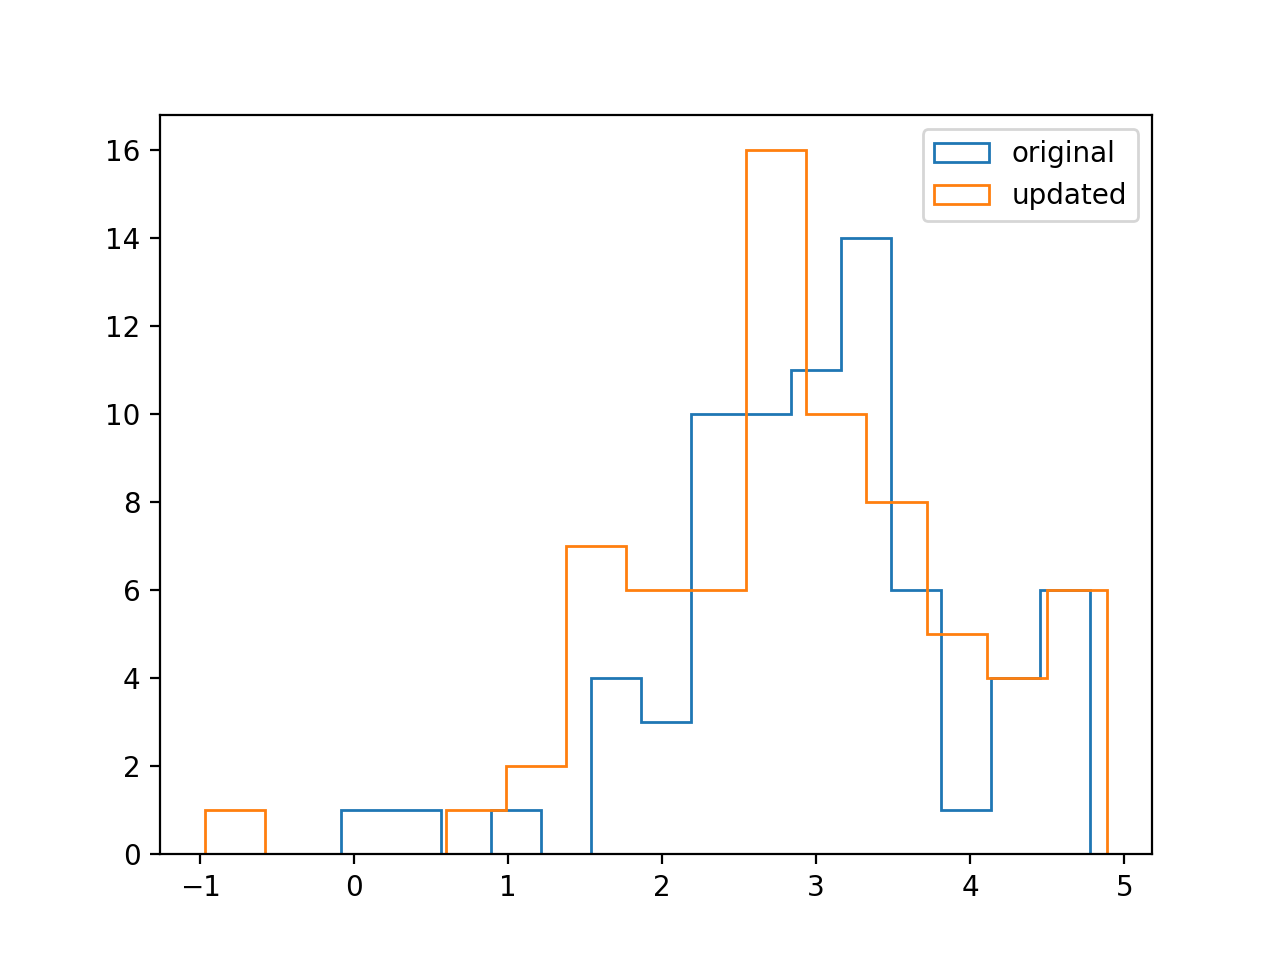

In [5]:
plt.hist(np.log(epseri.SAFE.values), bins=15, histtype='step', label='original')
plt.hist(np.log(epseri2.SAFE.values), bins=15, histtype='step', label='updated')
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


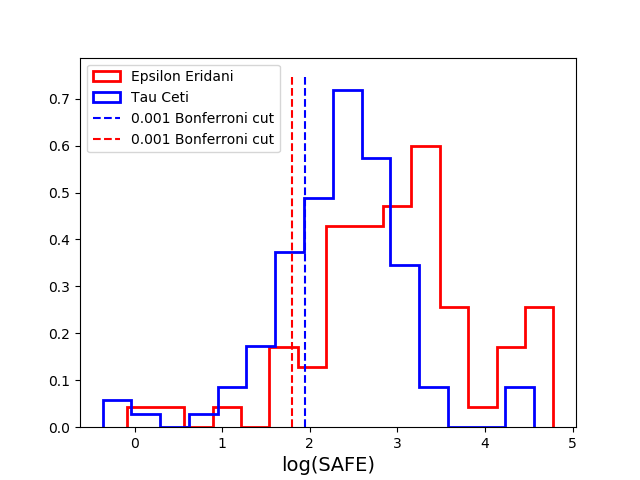

In [4]:
plt.hist(np.log(epseri.SAFE.values), bins=15, color='r', histtype='step', density=True, lw=2, label='Epsilon Eridani')
plt.hist(np.log(tauceti.SAFE.values), bins=15, color='b', histtype='step', density=True, lw=2, label='Tau Ceti')
plt.vlines(np.log(7), ymin=0, ymax=0.75, color='b', ls='--', label='0.001 Bonferroni cut')
plt.vlines(np.log(6), ymin=0, ymax=0.75, color='r', ls='--', label='0.001 Bonferroni cut')
plt.xlabel("log(SAFE)", fontsize=14)
plt.legend(loc='upper left')
plt.show()

In [5]:
import glob
filenames = [f for f in glob.glob("*.fits")]
filenames = np.array(filenames)[np.argsort([float(f.split("22049_")[1].split(".fits")[0]) for f in filenames])]
vels = pd.read_csv("22049.txt")
vels["FILENAME"] = np.array([str(f) for f in vels.FILENAME.values])
#filenames2 = np.array([f.split('ctd')[0] + '.fits' for f in filenames])
vels = vels.iloc[int(np.where(vels.FILENAME.values == filenames[0])[0]):int(np.where(vels.FILENAME.values == filenames[-1])[0]+1),:]

assert np.array_equal(filenames, vels.FILENAME.values)

In [6]:
from astropy.io import fits

In [7]:
SPECTRA = [fits.open(f) for f in filenames]
SPECTRA[0][0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 7920                                                  
NAXIS2  =                   86                                                  
EXTEND  =                    T                                                  
SITELONG= '-111.422515'        / East longitude site, decimal degrees           
SITELAT = '34.744305'          / Latitude of site, decimal degrees              
SITEELEV= '2337.0  '           / Elevation of observatory site (meters)         
TELESCP = 'DCT     '           / Name of telescope                              
INSTRMNT= 'EXPRES  '           / Name of instrument                             
DETECTOR= 'STA1600 '           / Detector type                                  
FPA     = 'EXPRES-D0'       

In [10]:
len(SPECTRA[0][1].data[1])

13

In [7]:
crytemp0 = np.array([float(spec[0].header["CRYTEMP0"]) for spec in SPECTRA])
crytemp1 = np.array([float(spec[0].header["CRYTEMP1"]) for spec in SPECTRA])
crytemp2 = np.array([float(spec[0].header["CRYTEMP2"]) for spec in SPECTRA])
crypress = np.array([float(spec[0].header["CRYPRESS"]) for spec in SPECTRA])
mjd = np.array([float(spec[0].header["TELMJD"]) for spec in SPECTRA])
moondist = np.array([float(spec[0].header["MOONDIST"]) for spec in SPECTRA])
sundist = np.array([float(spec[0].header["SUNDIST"]) for spec in SPECTRA])
airmass = np.array([float(spec[0].header["AIRMASS"]) for spec in SPECTRA])
exptime = np.array([float(spec[0].header["AEXPTIME"]) for spec in SPECTRA])
SAFE = pd.read_csv("Corrected_Pvals_22049_2.csv")
SAFE["CRYTEMP0"] = crytemp0
SAFE["CRYTEMP1"] = crytemp1
SAFE["CRYTEMP2"] = crytemp2
SAFE["CRYPRESS"] = crypress
SAFE["MJD"] = mjd
SAFE["MOONDIST"] = moondist
SAFE["SUNDIST"] = sundist
SAFE["AIRMASS"] = airmass
SAFE["EXPTIME"] = exptime

In [13]:
SAFE.columns

Index(['Unnamed: 0', 'Pvals', 'SAFE', 'b1', 'b0', 'b2', 'b3', 'b4', 'b5', 't1',
       't0', 't2', 't3', 't4', 't5', 'CRYTEMP0', 'CRYTEMP1', 'CRYTEMP2',
       'CRYPRESS', 'MJD', 'MOONDIST', 'SUNDIST', 'AIRMASS', 'EXPTIME'],
      dtype='object')

<IPython.core.display.Javascript object>


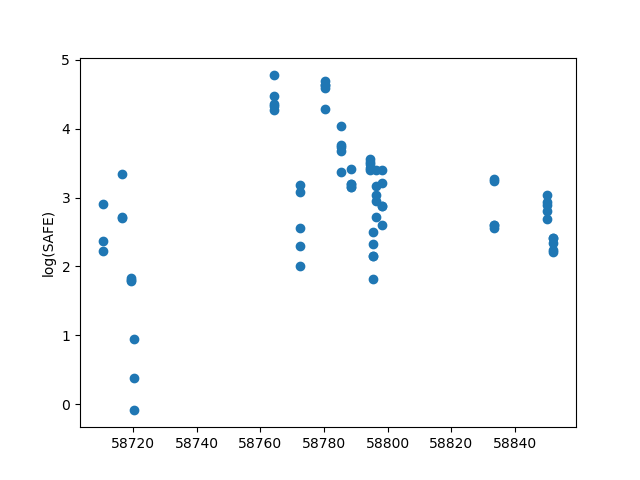

In [9]:
plt.scatter(SAFE.MJD.values, np.log(SAFE.SAFE.values))
plt.ylabel("log(SAFE)")
plt.show()

# Comparison to Other Stellar Activity Indicators

In [8]:
epseriact = pd.read_csv("22049_activity.txt")
epseriact["File Name"] = np.array([str(f) for f in epseriact["File Name"]])
epseriact = epseriact.iloc[int(np.where(epseriact["File Name"] == filenames[0])[0]):int(np.where(epseriact["File Name"] == filenames[-1])[0]+1),:]
assert np.array_equal(epseriact["File Name"].values, filenames)

In [9]:
epseriact.columns

Index(['Unnamed: 0', 'File Name', 'S Value', 'H-alpha Emission', 'CCF FWHM',
       'BIS', 'BIS+', 'BIS-', 'Bis. Slope', 'Bis. Curve', 'Bis. Bottom',
       'Velocity Span', 'Bi-Gaussian Center'],
      dtype='object')

<IPython.core.display.Javascript object>


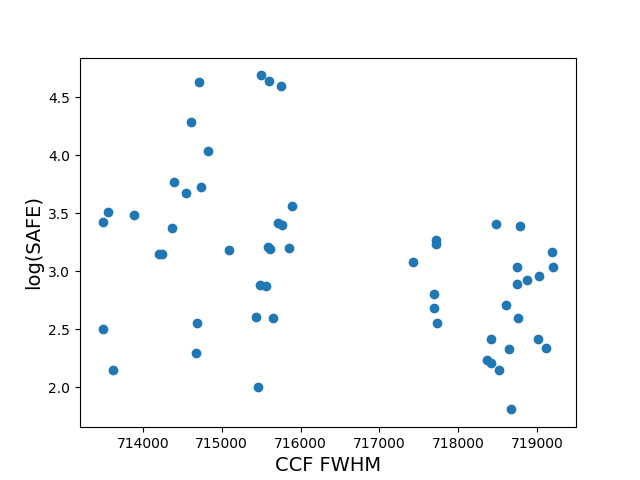

In [11]:
sai = 'CCF FWHM'
keep = np.where(epseriact[sai] > -1e6)[0]
plt.scatter(epseriact[sai].reindex(keep), np.log(epseri.SAFE.values[keep]))
#plt.xlim(np.min(epseriact[sai].reindex(keep)), np.max(epseriact[sai].reindex(keep)))
plt.xlabel(sai, fontsize=14)
plt.ylabel("log(SAFE)", fontsize=14)
plt.show()